# Rozkłady stabilne

## Julia Janiak

---

## Definicja

Rozkłady stabilne to rozkłady o funkcji charakterystycznej postaci:
	
$$ \phi _{ \alpha, \beta, \mu, \sigma} (t) = e^{i \mu t - |\sigma t|^{\alpha} (1 - i \beta sgn(t) \tan{\frac{ \pi \alpha}{2})} }, \alpha \neq 1 $$

$$ \phi _{ \alpha, \beta, \mu, \sigma} (t) = e^{i \mu t - |\sigma t|^{\alpha} (1 - i \beta sgn(t) \frac{2}{\pi} \ln |t|) }, \alpha = 1 $$

gdzie 

$\alpha \in (0,2], \beta \in [-1,1] , \mu \in {\rm I\!R}, \sigma > 0 .$	

Rozkład stabilny o funkcji charakterystycznej $ \phi_{\alpha, \beta , \mu , \sigma}(t)$ oznaczamy  $S(\alpha, \beta, \mu, \sigma).$

## Parametry rozkładu stabilnego

* $\alpha$ - parametr kształtu, zwany indeksem stabilności <br>
$\alpha = 2$ odpowiada rozkładowi normalnemu $N(\mu, \sigma \sqrt{2} )$


* $\beta$ - parametr skośności  <br>
Dla $\beta = 0$ rozkład jest symetryczny,  <br>
dla $ \beta > 0$ rozkład jest skupiony bardziej na półprostej dodatniej,  <br>
dla $\beta < 0$ rozkład jest skupiony bardziej na półprostej ujemnej.


* $\mu $ - parametr przesunięcia


* $\sigma $ - parametr skali

## Gęstość rozkładów stabilnych

Wszystkie rozkłady stabilne są rozkładami ciągłymi.
Jednak tylko dla trzech par parametrów $\alpha, \beta$ gęstość rozkładu stabilnego można wyrazić
za pomocą funkcji elementarnych:


1. rozkład normalny $N(0, 1)$:  <br>
$ \alpha = 2, \beta$ - nieistotne, $\mu = 0, \sigma = \frac{\sqrt{2}}{2} $

$$ f(x) = \frac{1}{\sqrt{2 \pi}} e^{\frac{-x^2}{2}} $$

2. rozkład Cauchy'ego $C(0, 1)$:  <br>
$ \alpha = 1, \beta = 0, \mu = 0, \sigma = 1 $ 

$$ f(x) = \frac{1}{\pi} \cdot \frac{1}{1+x^2} $$

3. rozkład Levy'ego $N(0, 1)$:  <br>
$ \alpha = \frac{1}{2}, \beta = 1, \mu = 0, \sigma = 1 $

$$ f(x) = \left\{ \begin{array}{ll}
\frac{1}{\sqrt{2\pi}} x^{-\frac{3}{2}} e^{-\frac{1}{2x}} & \textrm{dla $ x>0, $}\\
0 & \textrm{dla $ x \le 0 $}
\end{array} \right. $$


In [65]:
import random
import matplotlib.pyplot as plt
import numpy  as np
import scipy.stats as ss
import math
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import seaborn as sns
import statistics
from scipy.special import gamma
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8,6

In [56]:
def r_stabilny(alpha, beta, mu, sigma):
    """
    Funkcja generująca zmienną z rozkładu alfa stabilnego.
    Args:
        alfa (float): parametr kształtu
        beta (float): parametr skośności
        mu (float): parametr przesunięcia 
        sigma (float): parametr skali
    Returns:
        zmienna losowa z rozkładu alfa stabilnego
    """
    u = np.random.uniform(-np.pi/2, np.pi/2)
    e = np.random.exponential()
    if alpha != 1: 
        S = (1+beta**2 * (np.tan(np.pi*alpha/2))**2)**(1/(2*alpha)) 
        B = 1/alpha * np.arctan(beta*np.tan(np.pi*alpha/2)) 
        X = S*(np.sin(alpha*(u+B))/(np.cos(u))**(1/alpha)) * (np.cos(u-alpha*(u+B))/e)**((1-alpha)/alpha)
        Y = sigma*X + mu
        return Y
    else:
        X = 2/np.pi * ((np.pi/2 + beta * u ) * np.tan(u) - beta * np.log(((np.pi/2)*e*np.cos(u))/(np.pi/2 + beta*u)))
        Y = sigma * X + 2/np.pi * beta * sigma * np.log(sigma) + mu
        return Y

In [57]:
def funkcja_char(t, alpha, beta, mu, sigma):
    """
    Funkcja zwracająca wartości zespolone funkcji charakterystycznej teoretycznej rozkładu alfa stabilnego dla zakresu t.
    Args:
        t (numpy.ndarray): zakres t
        alfa (float): parametr kształtu
        beta (float): parametr skośności
        mu (float): parametr przesunięcia 
        sigma (float): parametr skali
    Returns:
        wartości zespolone f. charakterystycznej teoretycznej rozkładu alfa stabilnego
    """
    if alpha != 1:
        return np.exp(1j*mu*t - abs(sigma*t)**alpha * (1-1j*beta*np.sign(t)*np.tan(np.pi*alpha/2)))
    else:
        ln = [np.log(abs(i)) for i in t]
        return np.exp(1j*mu*t - abs(sigma*t)**alpha * (1-1j*beta*np.sign(t)*2*ln/np.pi))

In [58]:
def empchar(x, t):
    """
    Funkcja określająca wartość funkcji charakterystycznej w punkcie t dla próby x z rozkładu alfa stabilnego.
    Args:
        t (float): punkt, w którym określamy wartość funkcji
        x (list): próba z rozkładu alfa stabilnego
    Returns:
        wartość f. charakterystycznej w punkcie t
    """
    xs = sorted(x)
    fi = sum([np.exp(1j*t*i) for i in xs])/len(xs)
    return fi

In [59]:
def wykresy_fchar(alfa,beta,mu,sigma):
    """"
    Funkcja porównująca wykresy funkcji charakterystycznej empirycznej i teoretycznej dla próby z rozkładu alfa stabilnego.
    Args:
        alfa (float): parametr kształtu
        beta (float): parametr skośności
        mu (float): parametr przesunięcia 
        sigma (float): parametr skali
    Returns:
        wykresy funkcji charakterystycznej empirycznej i teoretycznej dla próby z rozkładu alfa stabilnego
    """
    
    r = [r_stabilny(alfa,beta,mu,sigma) for i in range(10000)]
    t = np.linspace(0.0001, 1, 1000)    
    plt.plot(t, empchar(r, t).real, label='f.charakterystyczna empiryczna')
    plt.plot(t, funkcja_char(t, alfa,beta,mu,sigma).real, label='f.charakterystyczna teoretyczna')
    plt.title("Porównanie funkcji charakterystycznej teoretycznej i empirycznej (część rzeczywista)", fontsize=16)
    plt.xlabel('t')
    plt.ylabel('Rez')
    plt.legend()
    plt.show()

    plt.plot(t, empchar(r, t).imag, label='f.charakterystyczna empiryczna')
    plt.plot(t, funkcja_char(t, alfa,beta,mu,sigma).imag, label='f.charakterystyczna teoretyczna')
    plt.title("Porównanie funkcji charakterystycznej teoretycznej i empirycznej (część zespolona)", fontsize=16)
    plt.xlabel('t')
    plt.ylabel('Imz')
    plt.legend()
    plt.show()

In [60]:
def wykresy_gęstości(alfa,beta,mu,sigma):
    """
    Funkcja porównująca wykresy gęstości empirycznej i teoretycznej dla próby z rozkładu alfa stabilnego.
    Args: 
        alfa (float): parametr kształtu
        beta (float): parametr skośności
        mu (float): parametr przesunięcia 
        sigma (float): parametr skali
    Returns:
        wykresy gęstości teoretycznej i empirycznej dla próby z rozkładu alfa stabilnego
    """
    r = [r_stabilny(alfa,beta,mu,sigma) for i in range(10000)]
    
    if alfa == 2:
        x1 = -6
        x2 = 6
    elif alfa == 0.5:
        x1 = 0
        x2 = 10
    else:
        x1 = -10
        x2 = 10
        
    x = np.linspace(x1, x2, 1000)
    plt.hist(r, density=True, bins=list(range(x1,x2)), label='gęstość empiryczna')
    plt.plot(x, ss.levy_stable.pdf(x, alpha=alfa, beta=beta, loc=mu, scale=sigma), 'r--', label='gęstość teoretyczna')
    plt.title("Porównanie gęstości teoretycznej i empirycznej", fontsize=16)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

In [61]:
def wykresy_dystr(alfa,beta,mu,sigma):
    """
    Funkcja porównująca wykresy dystrybuanty empirycznej i teoretycznej dla próby rozkładu alfa stabilnego.
    Args: 
        alfa (float): parametr kształtu
        beta (float): parametr skośności
        mu (float): parametr przesunięcia 
        sigma (float): parametr skali
    Returns:
        wykresy dystrybuanty teoretycznej i empirycznej dla próby z rozkładu alfa stabilnego
    """
    r = [r_stabilny(alfa,beta,mu,sigma) for i in range(10000)]
    
    if alfa == 0.5:
        x1 = 0
        x2 = 50
    else:
        x1 = -5
        x2 = 5
        
    x = np.linspace(x1, x2, 1000)
    ecdf = ECDF(r)
    plt.plot(ecdf.x, ecdf.y, label='dystrybuanta empiryczna')
    plt.plot(x, ss.levy_stable.cdf(x, alpha=alfa, beta=beta, loc=mu, scale=sigma), 'r--', label='dystrybuanta teoretyczna')
    plt.xlim(x1,x2)
    plt.title("Porównanie dystrybuanty teoretycznej i empirycznej", fontsize=16)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

In [62]:
def testy_KS(alfa,beta,mu,sigma, n=100):
    """
    Funkcja sprawdzająca czy próba wygenerowana przez nasz algorytm pochodzi z rozkładu alfa stabilnego.
    Args: 
        alfa (float): parametr kształtu
        beta (float): parametr skośności
        mu (float): parametr przesunięcia 
        sigma (float): parametr skali
        n (int): ilość przeprowadzonych testów
    Returns:
        wiarygodność w procentach na podstawie przeprowadzonych testów
    """
    w=0
    for i in range(n):
        if ss.kstest([r_stabilny(alfa,beta,mu,sigma)  for i in range(100)],\
                     'levy_stable', args=(alfa,beta,mu,sigma)).pvalue > 0.05:
            w+=1
    print("Wiarygodność:" + str(w/n*100) +"%")

#### r. normalny $ N(0,1)  $
$ \alpha=2, \beta=0, \mu=0, \sigma=\frac{\sqrt2}{2} $

In [18]:
testy_KS(2,0,0,math.sqrt(2)/2)

Wiarygodność:96.0%


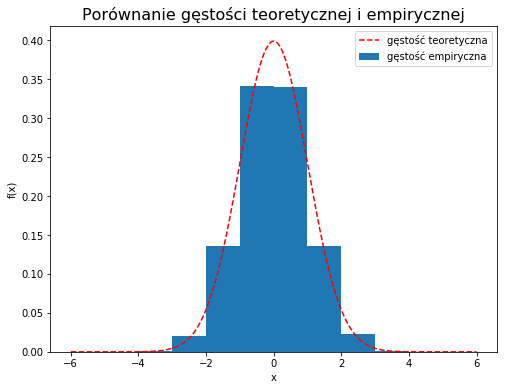

In [19]:
wykresy_gęstości(2,0,0,math.sqrt(2)/2)

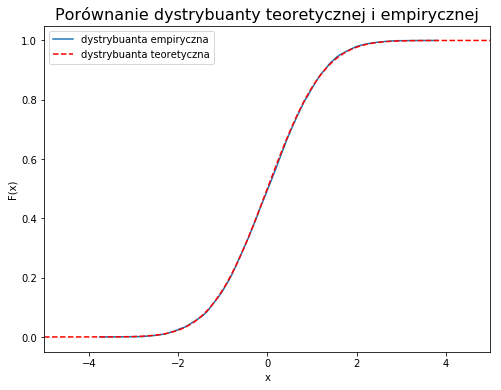

In [20]:
wykresy_dystr(2,0,0,math.sqrt(2)/2)

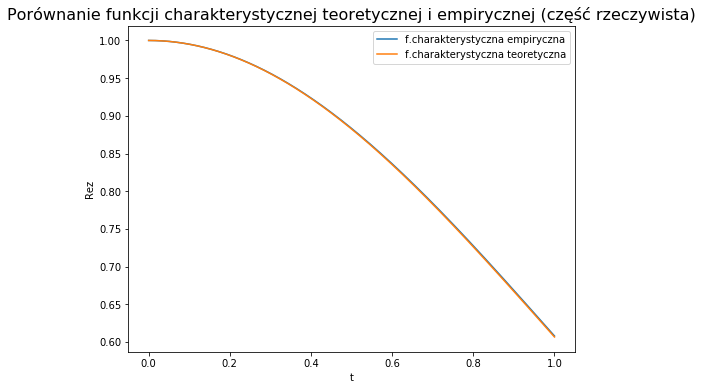

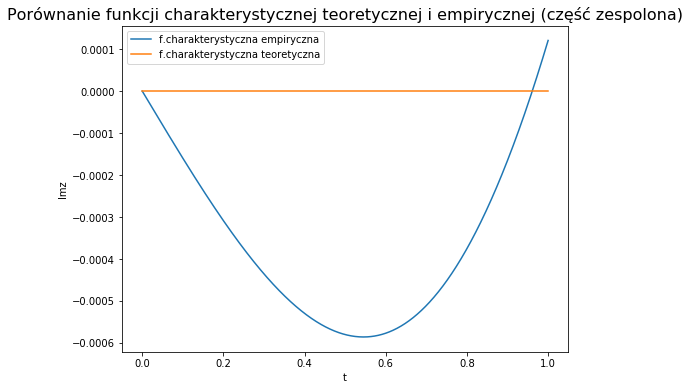

In [21]:
wykresy_fchar(2,0,0,math.sqrt(2)/2)

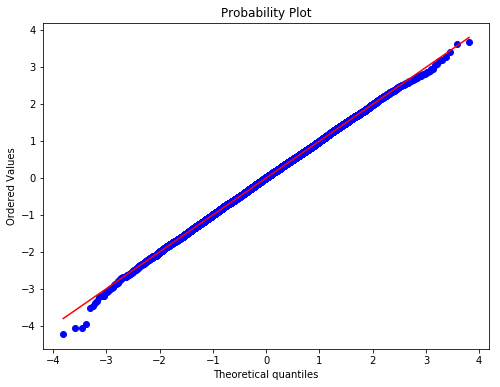

In [22]:
r1 = [r_stabilny(2,0,0,math.sqrt(2)/2) for i in range(10000)]
ss.probplot(r1, plot=plt)
plt.show()

#### r. Cauchyego $C(0,1)$ 
$ \alpha=1, \beta=0, \mu=0, \sigma=1 $

In [23]:
testy_KS(1,0,0,1)

Wiarygodność:97.0%


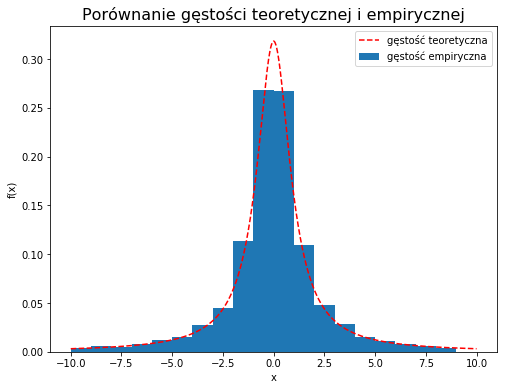

In [24]:
wykresy_gęstości(1,0,0,1)

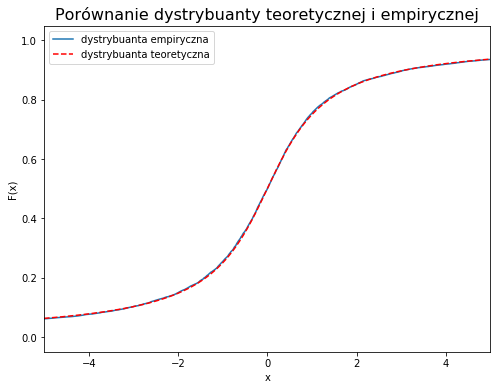

In [25]:
wykresy_dystr(1,0,0,1)

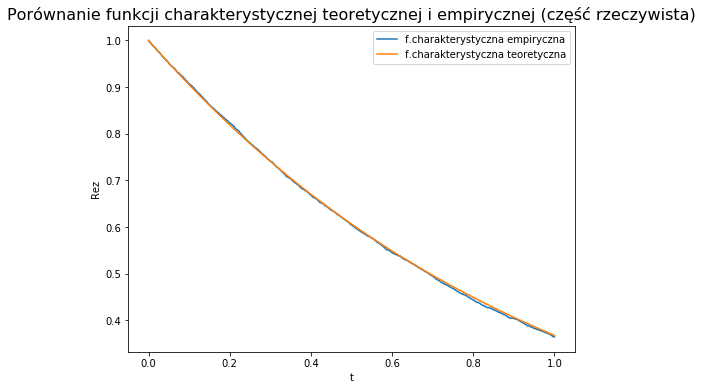

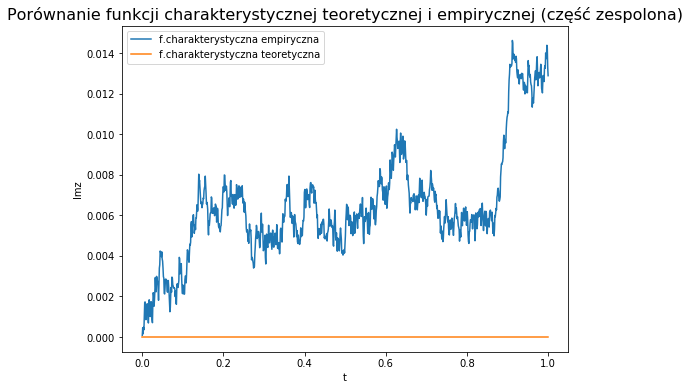

In [26]:
wykresy_fchar(1,0,0,1)

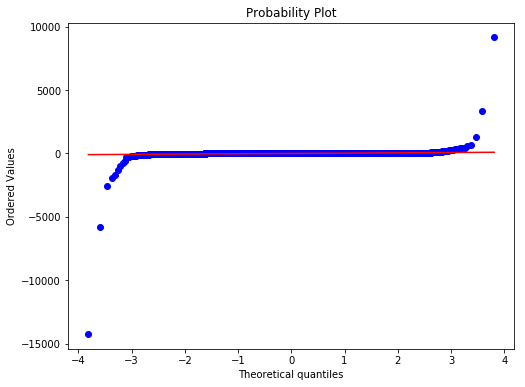

In [27]:
r2 = [r_stabilny(1,0,0,1) for i in range(10000)]
ss.probplot(r2, plot=plt)
plt.show()

####  r. Levy'ego
$ \alpha=\frac{1}{2}, \beta=1, \mu=0, \sigma=1 $

In [28]:
testy_KS(0.5,1,0,1)

Wiarygodność:97.0%


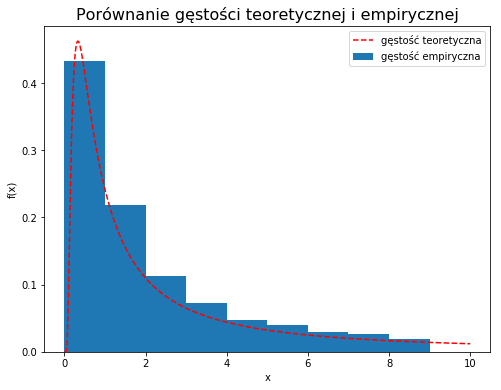

In [29]:
wykresy_gęstości(0.5,1,0,1)

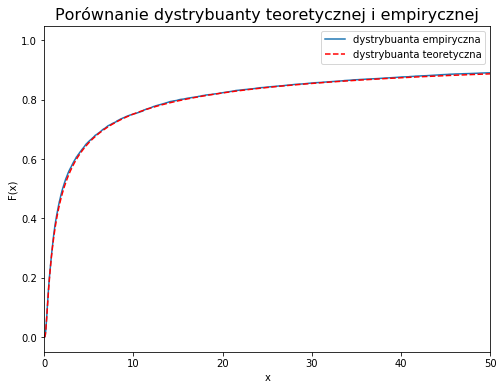

In [30]:
wykresy_dystr(0.5,1,0,1)

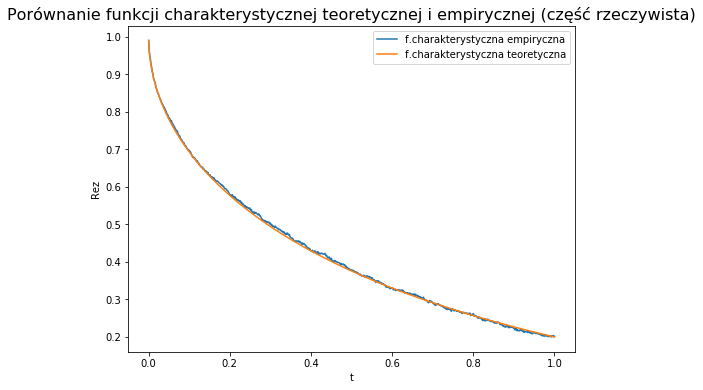

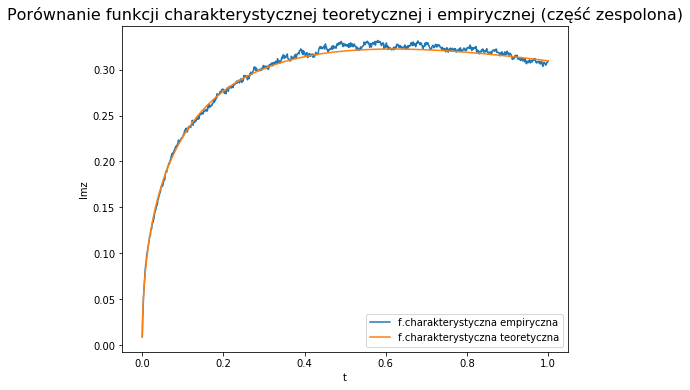

In [31]:
wykresy_fchar(0.5,1,0,1)

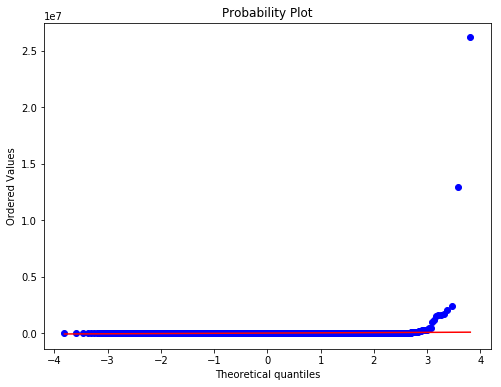

In [32]:
r3 = [r_stabilny(0.5,1,0,1) for i in range(10000)]
ss.probplot(r3, plot=plt)
plt.show()

#### $ \alpha=\sqrt{2}, \beta=0, \mu=0, \sigma=1 $

In [107]:
testy_KS(math.sqrt(2),1,0,1)

Wiarygodność:96.0%


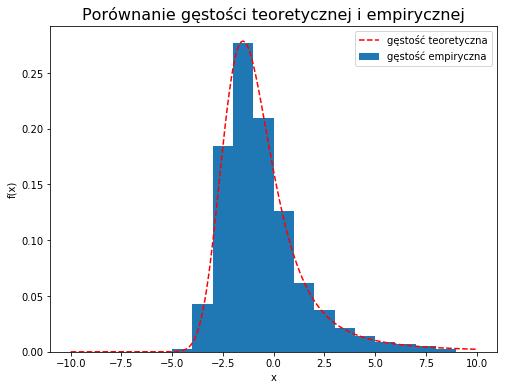

In [108]:
wykresy_gęstości(math.sqrt(2),1,0,1)

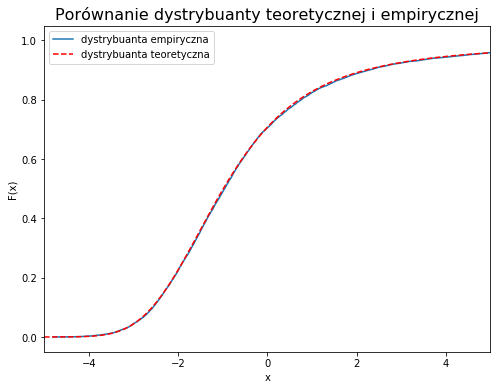

In [109]:
wykresy_dystr(math.sqrt(2),1,0,1)

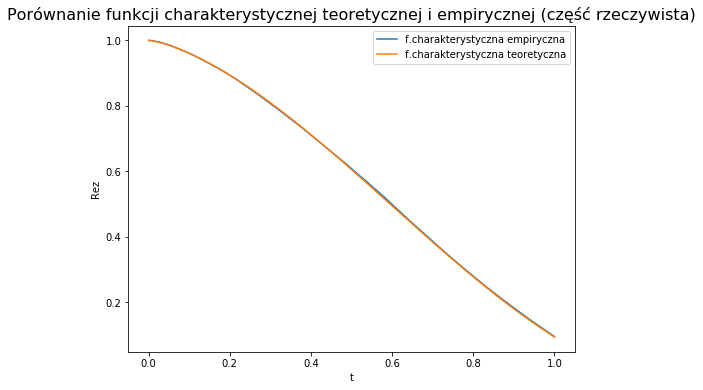

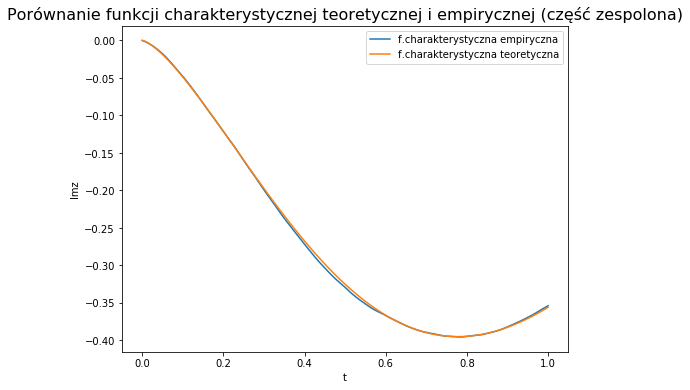

In [110]:
wykresy_fchar(math.sqrt(2),1,0,1)

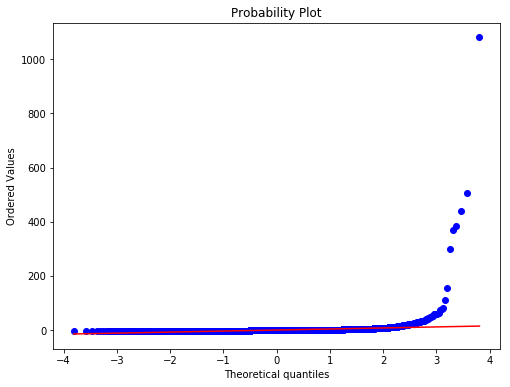

In [111]:
r4 = [r_stabilny(math.sqrt(2),1,0,1) for i in range(10000)]
ss.probplot(r4, plot=plt)
plt.show()

Zbadaliśmy poprawność zaimplementowanego algorytmu generującego zmienne losowe z rozkładu alfa stabilnego poprzez przeprowadzenie testów KS i porównanie wykresów funkcji charakterystycznych, dystrybuant oraz gęstości empirycznych z teoretycznymi dla $ \alpha \in \{\frac{1}{2},1,\sqrt{2},2\} $. Możemy zauważyć, że w większości przypadków wykresy pokrywają się. Dla zadanych $ \alpha $ zmienne przechodzą test KS z wiarygodnością conajmniej 95%. Możemy więc wywnioskować, że algorytm jest poprawny.

---

## Obszary przyciągania rozkładów stabilnych

### Definicja

Mówimy, że rozkład $R$ należy do obszaru przyciągania pewnego rozkładu stabilnego $S(\alpha, \beta, \mu, \sigma)$, jeżeli dla ciągu $X_{1}, X_{2}, . . .$ niezależnych zmiennych losowych o jednakowym rozkładzie $R$ istnieją ciągi stałych $a_{n} \in {\rm I\!R}$, $b{n} > 0,$ takie że
	
$$ \frac{X_{1} + ... + X_{n} - a_{n}}{b_{n}} \rightarrow Y $$

gdzie $Y$ ma rozkład $S(\alpha, \beta, \mu, \sigma)$.

### Warunki konieczne i wystarczajace do przynależności do obszaru przyciągania rozkładu stabilnego

Rozkład $R$ o dystrybuancie $F(x)$ należy do obszaru przyciągania rozkładu stabilnego <br>
$S(\alpha, \beta, \mu, \sigma)$ z indeksem stabilności $\alpha < 2$ wtedy i tylko wtedy, gdy dla dowolnego $y > 0$

$$ \lim_{x\to\infty} \frac{F(-xy) + 1 - F(xy)}{F(-x) + 1 - F(x)} = y^{-\alpha} $$

przy czym istnieją granice

$$ \lim_{x\to\infty} \frac{1 - F(x)}{F(-x) + 1 - F(x)} $$ 

$$ \lim_{x\to\infty} \frac{F(-x)}{F(-x) + 1 - F(x)}. $$

Warunki te oznaczają, że rozkład $R$ ma asymptotycznie takie same ogony jak graniczny rozkład stabilny. 

Rozkład $R$ o dystrybuancie $F(x)$ należy do obszaru przyciągania rozkładu normalnego wtedy i tylko wtedy, gdy dla dowolnego $y > 0$

$$ \lim_{x\to\infty} \frac{\int_{|t|<xy} t^2dF(t)}{\int_{|t|<x} t^2dF(t)} = 1. $$

Gdy wariancja rozkładu $R$ jest skończona i większa od 0, warunek powyższy jest spełniony. <br>
Nie są to jednak warunki równoważne. 
	
Rozkład $R$ o dystrybuancie $F(x)$ należy do normalnego obszaru przyciągania rozkładu stabilnego 	$S(\alpha, \beta, \mu, \sigma)$ z indeksem stabilności $\alpha < 2$ wtedy i tylko wtedy, gdy dla pewnego	$c_{0} > 0$

$$ \lim_{x\to\infty} \frac{F(-x) + 1 - F(x)}{(\frac{x}{c_{0}})^{-\alpha}} = 1 $$
oraz
$$ \lim_{x\to\infty} \frac{1 - F(x)}{F(-x) + 1 - F(x)} = \frac{1+\beta}{2}. $$ 

Wówczas dla ciągu $X_{1}, X_{2}, ..$ niezależnych zmiennych losowych o jednakowym rozkładzie $R$ mamy

$$ \frac{X_{1} + ... + X_{n} - a_{n}}{b_{n}} \rightarrow Y, $$

gdzie $Y$ ma rozkład $S(\alpha, \beta, \mu, \sigma)$ dla 

$$ a_{n} = \left\{ \begin{array}{ll}
0 & \textrm{gdy $ \alpha < 1, $}\\
nEX_{i} & \textrm{gdy $ 1 < \alpha < 2, $}\\
n^{2}\Big(\frac{\pi}{2} c_{0} E\sin{\Big(\frac{2X_{i}}{\pi c_{0}n}\Big)}\Big) & \textrm{gdy $ \alpha = 1 $}
\end{array} \right. $$ 

oraz

$$ b_{n} = \left\{ \begin{array}{ll}
\Big(\frac{ \Gamma{(2-\alpha)} \cos{(\frac{\pi \alpha}{2})}}{1-\alpha} \Big)^{\frac{1}{\alpha}} & \textrm{gdy $ \alpha \neq 1, $} \\
\frac{\pi}{2} c_{0} n & \textrm{gdy $ \alpha = 1 $}
\end{array} \right. $$ 

Rozkład zmiennej losowej $X_{i}$ należy do normalnego obszaru przyciągania rozkładu normalnego, wtedy i tylko wtedy, gdy $ 0 < D^{2}X_{i} = \sigma < \infty. $ 

Wówczas $$ \frac{X_{1} + ... + X_{n} - a_{n}}{b_{n}} \rightarrow Y, $$
gdzie $Y$ ma rozkład $N(0, 1)$, dla $a_{n} = nEX_{i}$ oraz
$b_{n} = \sigma \sqrt{n}$.

Gdy $F(0) = 0$, warunki należenia do normalnego obszaru przyciągania rozkładu stabilnego jeszcze się upraszczają: <br>
pierwszy z nich przyjmuje postać

$$ \lim_{x\to\infty} \dfrac{ 1 - F(x)}{(\frac{x}{c_{0}})^{-\alpha}} = 1 $$

a drugi warunek jest zawsze spełniony z $ \beta = 1 $ (co oznacza, że rozkład nieujemnej zmiennej losowej może należeć do obszaru przyciągania jedynie takiego rozkładu stabilnego, dla którego $ \beta = 1$).


---

Sprawdzimy teraz symulacyjnie uogólnione Centralne Twierdzenie Graniczne dla symetrycznego rozkładu Pareto.
Niech $X_{i}$ będą iid z symetrycznego rozkładu Pareto. Sprawdzamy, czy $c_{A,\alpha} \sum_{i=1} ^{n} \dfrac{X_{i
}}{n^{\frac{1}{\alpha}}} $ zbiega z $ n \to \infty $ do rozkładu stabilnego z parametrem stabilnosci $\alpha$ .

Aby generować zmienne z symetrycznego rozkładu Pareto, odwracamy analitycznie dystrybuantę rozkładu Pareto $F(x) =  1 - \frac{1}{(1+Ax)^{\alpha}} .$


Jeśli zmienna losowa $U$ ma rozkład jednostajny na odcinku $[0, 1]$, to zmienna losowa $X = F^{-1}(U)$ ma rozkład o dystrybuancie $F(x)$.

$$ u = F(x) = 1 - \frac{1}{(1+Ax)^{\alpha}} $$

$$ \frac{1}{(1+Ax)^{\alpha}} = 1 - u $$

$$ (1+Ax)^{\alpha} = \frac{1}{1-u}  $$

$$ 1+Ax = \Big(\frac{1}{1-u}\Big) ^{\frac{1}{\alpha}} $$

$$ x = \frac{1}{A} \Big(\Big(\frac{1}{1-u}\Big) ^{\frac{1}{\alpha}} - 1\Big) $$

Ponieważ $ u \sim U(0,1) $ możemy zapisać:

$$ x = \frac{1}{A} \Big(\Big(\frac{1}{u}\Big) ^{\frac{1}{\alpha}} - 1\Big) .$$






In [63]:
def generator_Pareto(n, alfa, a): 
    """
    Funkcja generująca zmienne z rozkładu Pareto metodą odwrotnej dystrybuanty.
    Args:
        n (int): długość próby
        alfa (float): parametr alfa
        a (float): parametr a
    Returns:
        posortowana próba zmiennych losowych z rozkładu Pareto o długości n
    """
    variables = [] 
    while len(variables) < n:
        znak = random.choice([1, -1])
        u = random.random()
        x = 1/a * (1/(u)**(1/alfa) -1)
        variables.append(znak*x)
    return sorted(variables)

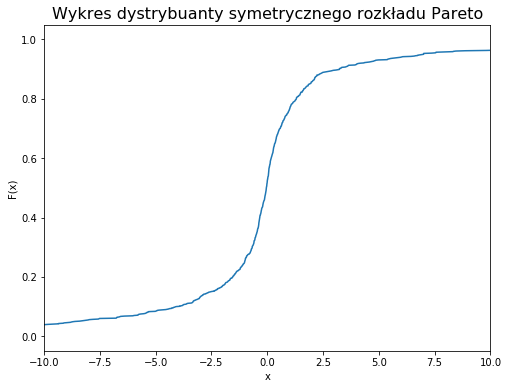

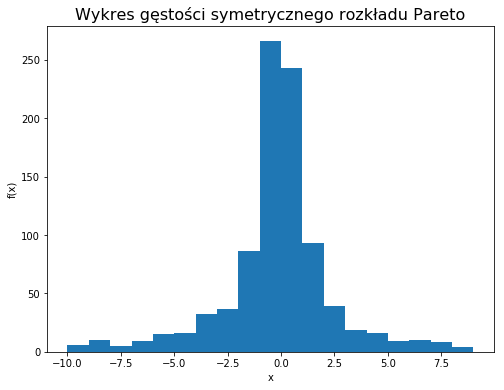

In [34]:
g = generator_Pareto(1000, 1, 1)
plt.plot(ECDF(g).x, ECDF(g).y)
plt.xlim(-10,10)
plt.title("Wykres dystrybuanty symetrycznego rozkładu Pareto", fontsize=16)
plt.xlabel('x')
plt.ylabel("F(x)")
plt.show()

plt.hist(g, bins=list(range(-10,10)))
plt.title("Wykres gęstości symetrycznego rozkładu Pareto", fontsize=16)
plt.xlabel('x')
plt.ylabel("f(x)")
plt.show()

Stałą normującą $c_{A,\alpha} = \dfrac{2 \Gamma (\alpha) \sin (\frac{\pi \alpha}{2})}{\pi c_{\infty}}$ wyliczamy analitycznie.

Zaczynamy od wyliczenia $ c_{\infty} = 2\lim_{x \to \infty}  x^{\alpha}(1 −F(x)) $, gdzie $F$ jest dystrybuantą rozkładu Pareto równą $ 1 - \frac{1}{(1+Ax)^{\alpha}} $

$$ c_{\infty} = 2\lim_{x \to \infty}  x^{\alpha}(1 −F(x)) = 2\lim_{x \to \infty}  x^{\alpha}\Big(1 −1 + \frac{1}{(1+Ax)^{\alpha}}\Big) = 2\lim_{x \to \infty}  x^{\alpha}\frac{1}{(1+Ax)^{\alpha}} = $$ <br>

$$ = 2\lim_{x \to \infty}  \Big(\frac{x}{1+Ax}\Big)^{\alpha} = 2\lim_{x \to \infty}  \Big(\frac{x}{x(\frac{1}{x}+A)}\Big)^{\alpha} = 2\lim_{x \to \infty}  \Big(\frac{1}{\frac{1}{x}+A}\Big)^{\alpha} = 2 \cdot A ^{-\alpha} $$ <br>

Następnie wyliczamy $c_{A,\alpha}$.

$$ c_{A,\alpha} = \frac{2 \Gamma (\alpha) \sin (\frac{\pi \alpha}{2})}{\pi c_{\infty}} = \frac{2 \Gamma (\alpha) \sin (\frac{\pi \alpha}{2})}{2 \pi A ^{-\alpha}} = \frac{A ^{\alpha}}{\pi} \Gamma (\alpha) \sin \Big(\frac{\pi \alpha}{2}\Big) $$




In [66]:
def c(A, alfa):
    """
    Funkcja zwracająca wartość stałej normującej c.
        alfa (float): parametr kształtu alfa
        a (float): parametr a
    Returns:
        wartość stałej c
    """
    return 1/np.pi * (A)**alfa * gamma(alfa) * np.sin(np.pi * alfa/2)

In [67]:
def ctg_pareto_val(alfa, A, n, m=100):
    """
    Funkcja zwracająca próbę o długości m zmiennych równych c * sum(Xi/n^(1/alfa)), 
    gdzie c - stała normująca przyjmująca argumenty alfa, a,
    Xi - niezależne zmienne z symetrycznego rozkładu Pareto
    Args:
        alfa (float): parametr kształtu alfa
        A (float): parametr A
        n (int): ilość niezależnych zmiennych Xi
        m (int): wielkość zwracanej próby
    Returns:
        próba zmiennych losowych 
    """
    return [c(A, alfa) * sum(generator_Pareto(n, alfa, A)) * 1/n**(1/alfa) for i in range(m)]

In [68]:
#przykładowe parametry
A=2
alfa=1
n_list = [10, 100, 1000, 10000]

Przeprowadzamy testy KS dla podanych parametrów.

In [74]:
for n in n_list:
    w=0
    for i in range(100):
        prob = ctg_pareto_val(alfa, A, n)
        if ss.kstest(prob, 'levy_stable', args=(alfa, 0, 0, 1)).pvalue > 0.05:
            w+=1
    print("Wiarygodność dla n=" + str(n) + " : " + str(w) +"%")            

Wiarygodność dla n=10 : 9%
Wiarygodność dla n=100 : 16%
Wiarygodność dla n=1000 : 20%
Wiarygodność dla n=10000 : 20%


Możemy zauważyć, że im większe n tym większa wiarygodność, że dana próba jest z rozkładu $\alpha$-stabilnego.

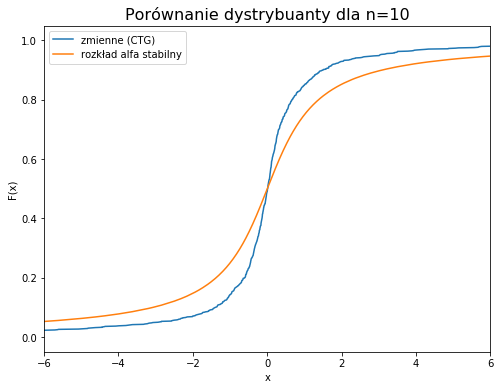

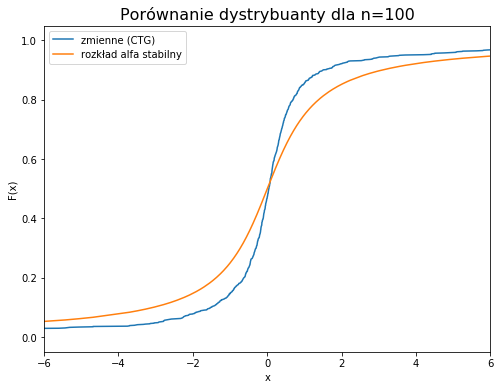

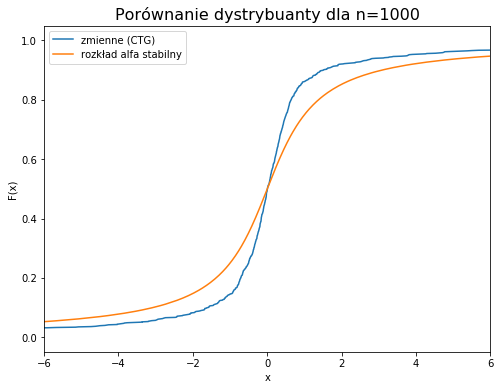

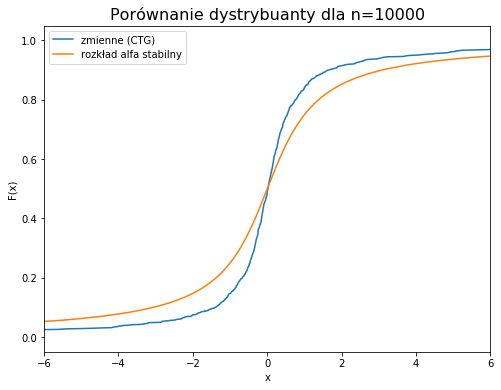

In [69]:
for n in n_list:
    proba = ctg_pareto_val(alfa, A, n, 1000)
    
    ecdf = ECDF(proba)

    plt.plot(ecdf.x, ecdf.y, label = 'zmienne (CTG)')
    plt.plot(ecdf.x, ss.levy_stable.cdf(ecdf.x, alpha=alfa, beta=0, loc=0, scale=1), label = 'rozkład alfa stabilny')
    plt.xlim(-6,6)
    plt.title("Porównanie dystrybuanty dla n=" + str(n), fontsize=16)
    plt.xlabel('x')
    plt.ylabel("F(x)")
    plt.legend()
    plt.show()

Z porównania dystrybuant dla różnych n wynika, że $ c_{A,\alpha} \sum_{i=1} ^{n} \dfrac{X_{i}}{n^{\frac{1}{\alpha}}} $ zbiega z $ n \to \infty $ do rozkładu stabilnego z parametrem stabilnosci $\alpha$ . 

---

##### Sprawdzamy symulacyjnie nieskonczoną podzielnoność rozkładów zmiennych ściśle stabilnych.

Rozkład jest nieskonczenie podzielny, jeśli dla każdego $ n \in N $ da
się przedstawić, jako rozkład sumy n niezależnych zmiennych losowych o tym
samym rozkładzie. Zmienna X ma rozkład ściśle stabilny, jeśli dla każdego $ n \in N $ istnieje stałe $c_{n}$ takie, że $c_{n}X $ ma rozkład taki sam jak $ \sum_{i=1}^{n} X_{i} $,  gdzie $X_{i} $ są niezależnymi kopiami $X$. Stałe $ c_{n} = n^{\frac{1}{\alpha}} $.

In [132]:
def rss(alfa, n, m=1000):
    """
    Funkcja zwracająca dwie próby losowe o długości m.
    Args: 
        alfa (float): parametr kształtu
        n (int): wielkość sumy niezależnych Xi, 
        m (int): długość każdej z prób
    Returns:
        r_stab: próba cn * X
        r_stab_suma: próba sum(Xi)
    """
    
    r_stab = [r_stabilny(alfa,0,0,1)*n**(1/alfa) for i in range(m)]
    r_stab_suma = [sum([r_stabilny(alfa,0,0,1)for j in range(n)]) for i in range(m)]
    
    return r_stab, r_stab_suma

Przeprowadzając test KS dla róznych n sprawdzamy, czy probki pochodzą z tego samego rozkładu.

In [130]:
n_list = [10, 50, 100, 500, 1000]

In [78]:
for n in n_list:
    w=0
    for i in range(100):
        proba1, proba2 = rss(1,n, 100)
        if ss.ks_2samp(proba1, proba2).pvalue > 0.05:
            w+=1
    print("Wiarygodność dla n=" + str(n) + " : " + str(w) +"%")            

Wiarygodność dla n=10 : 97%
Wiarygodność dla n=50 : 98%
Wiarygodność dla n=100 : 91%
Wiarygodność dla n=500 : 95%
Wiarygodność dla n=1000 : 95%


Porównamy teraz dystrybuanty dla różnych n.

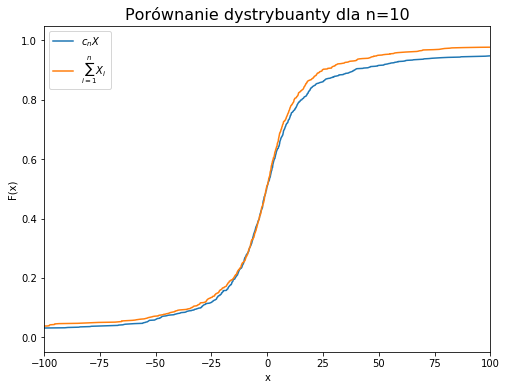

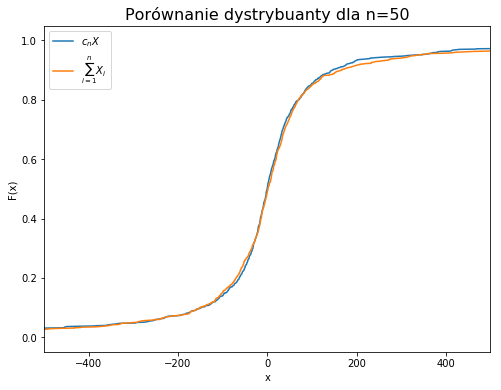

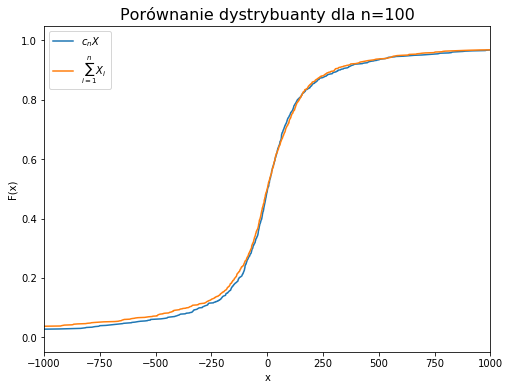

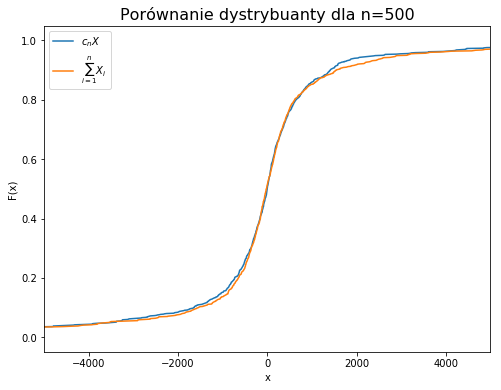

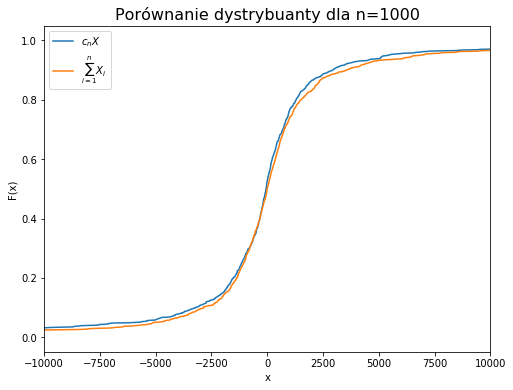

In [135]:
for n in n_list:
    proba1, proba2 = rss(1, n)
    
    ecdf1 = ECDF(proba1)
    ecdf2 = ECDF(proba2)

    plt.plot(ecdf1.x, ecdf1.y, label = '$ c_{n} X $')
    plt.plot(ecdf2.x, ecdf2.y, label = '$ \sum_{i=1}^{n} X_{i} $')
    plt.xlim(-n*10,n*10)
    plt.title("Porównanie dystrybuanty dla n=" + str(n), fontsize=16)
    plt.xlabel('x')
    plt.ylabel("F(x)")
    plt.legend()
    plt.show()

Z przeprowadzonych testów oraz porównania dystrybuanty dla różnych n wynika, że rozkład zmiennych ściśle stabilnych jest nieskończenie podzielny.